# ***Engr.Muhammad Javed***

## **Sihouette Score:**

## *Importing Required Libraries*


In [21]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.cluster import KMeans


## *Loading the Dataset*


In [22]:
Dataset = pd.read_csv(r"E:\AI and Data Science\ML with Engr.Muhammad Javed\File\Iris.csv")

## *Show Dataset*


In [23]:
Dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## *Removing Unnecessary Columns from the Dataset*


In [24]:
Dataset.drop("Id" , axis=1 , inplace=True)

## *Visualizing Predicted Clusters Using Pairplot*


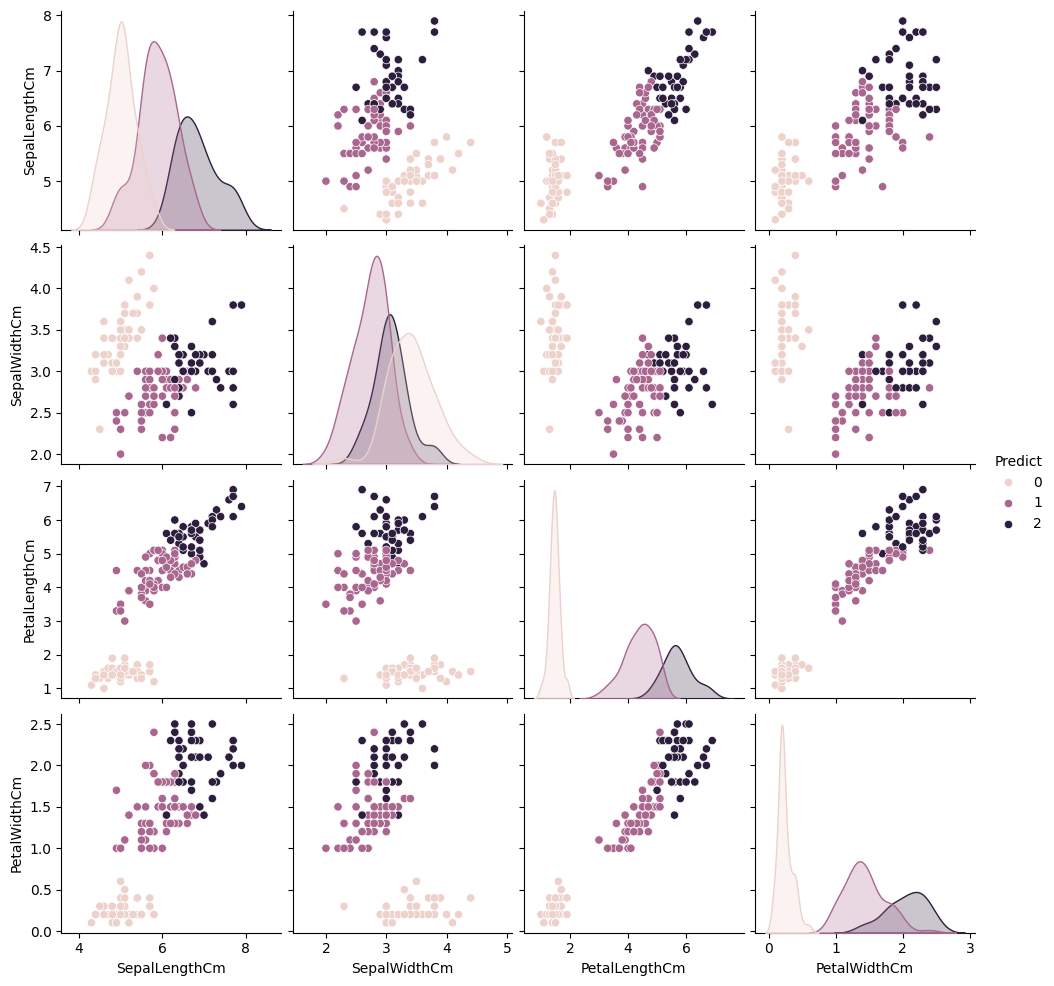

<Figure size 640x480 with 0 Axes>

In [40]:
sn.pairplot(Dataset , hue="Predict")
plt.show()
plt.savefig("pairplot.png")

## *Removing Unnecessary Columns from the Dataset*


In [33]:
Dataset.drop(["Species"] , axis = 1 , inplace = True)


## *Show Dataset*


In [34]:
Dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## *Show Dataset*


In [35]:
Dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## *Finding the Optimal Number of Cluster*

In [36]:
wcss = []

for i in range(2 , 21):
    kmn = KMeans(n_clusters=i , init = "k-means++")
    kmn.fit(Dataset)
    wcss.append(kmn.inertia_)

    

## *Applying Elbow Method to Identify Optimal Number of Clusters*


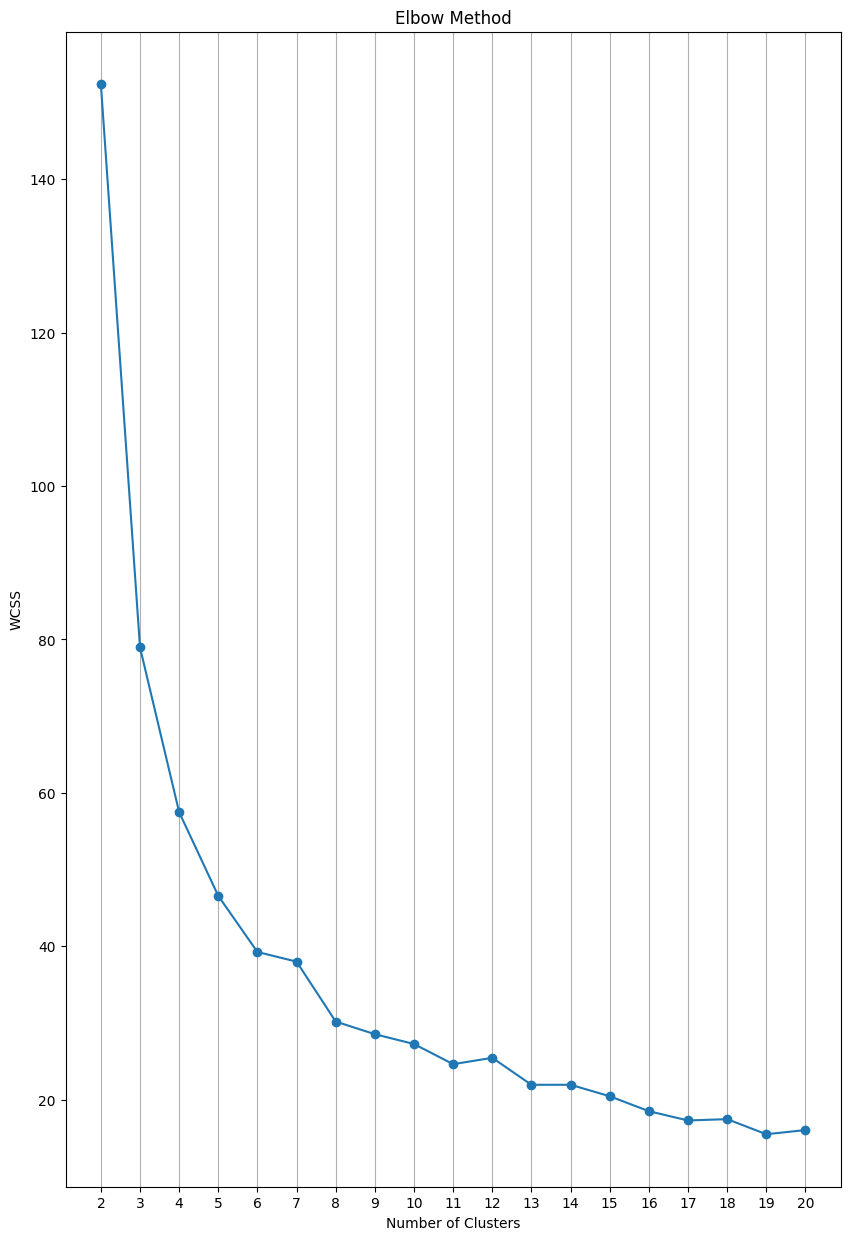

In [37]:
plt.figure(figsize = (10 , 15))
plt.plot(range(2 , 21) , wcss , marker = "o")
plt.title("Elbow Method")
plt.grid(axis = "x")
plt.xticks(range(2 , 21))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()




## *Applying K-Means Clustering and Assigning Predicted Cluster Labels*


In [38]:
kmn = KMeans(n_clusters=3)
kmn.fit(Dataset)
Dataset["Predict"] = kmn.predict(Dataset)

In [39]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

## *Visualizing K-Means Clustering Results with Custom Color Palette*


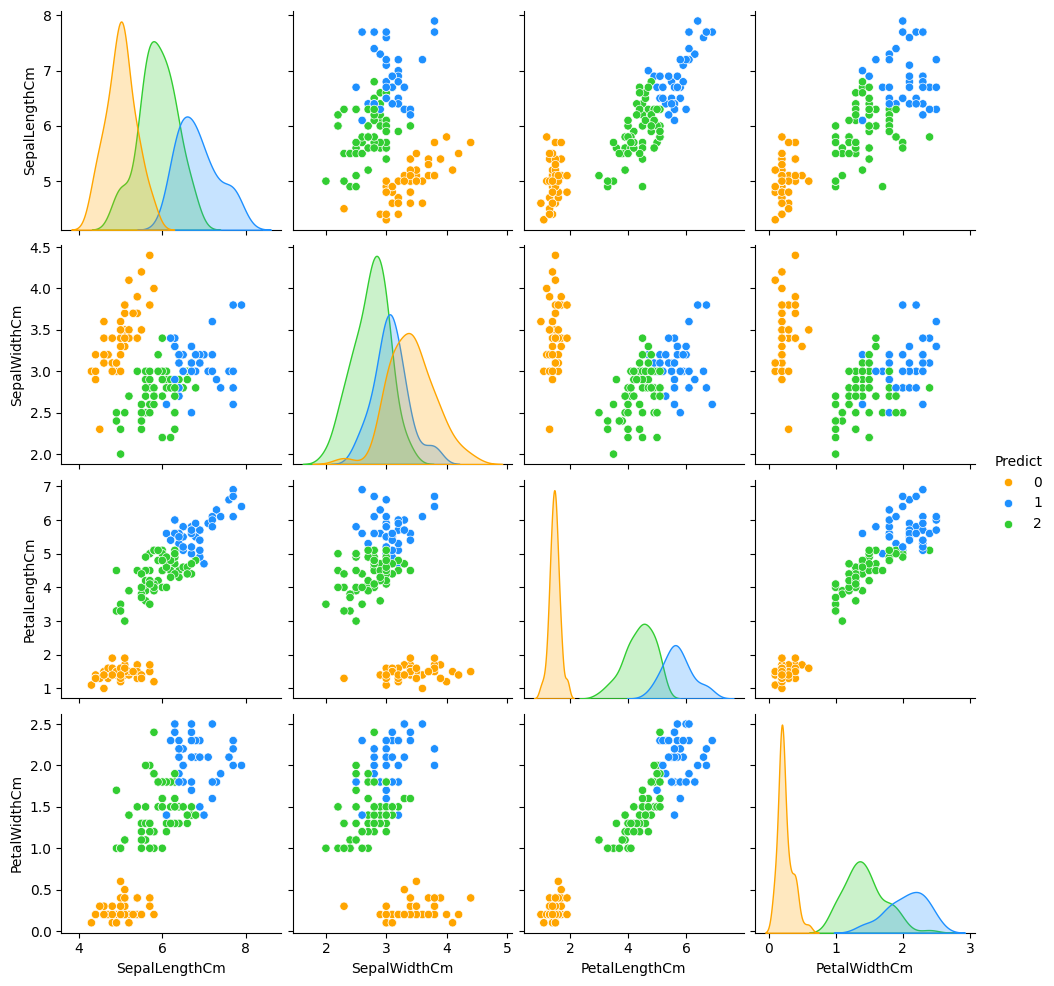

<Figure size 640x480 with 0 Axes>

In [ ]:

custom_palette = ["#FFA500", "#1E90FF", "#32CD32"]
sn.pairplot(data = Dataset , hue = "Predict" , palette=custom_palette)
plt.show()
plt.savefig("Kmeans_Clustring.png")

## *Silhouette Score*

In [ ]:
from sklearn.metrics import silhouette_score

In [41]:
silhouette_score(Dataset , kmn.labels_)

0.6116390494392431

## *Calculating Silhouette Scores for Different Numbers of Clusters*


In [43]:
ss = []
no_clusters = [j for j in range(2 ,21)]

for i in range(2 , 21):
    kmn1 = KMeans(n_clusters=i)
    kmn1.fit(Dataset)
    ss.append(silhouette_score(Dataset , kmn1.labels_))



## *Visualizing Silhouette Scores to Determine Optimal Number of Clusters*


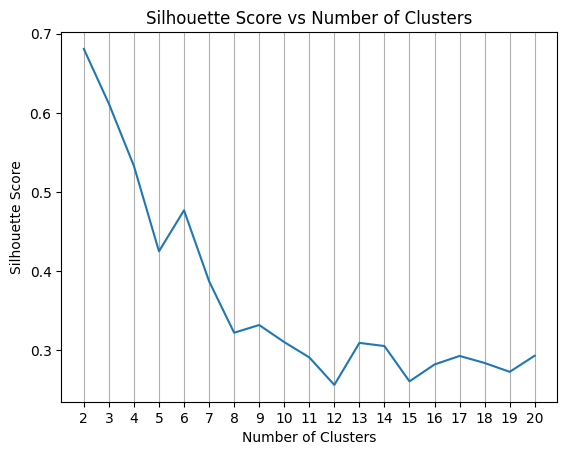

In [44]:
plt.plot(no_clusters , ss )
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(axis = "x")
plt.xticks(range(2 , 21))
plt.show()